# Lasso Regression Modeling

Lasso Regularization, or L1 Regression, is a form of linear regression that seeks to reduce multicollinearity, or nonindependence or predictor variables, by zeroing out beta coefficients of irrelevant features. It does this by making the sum of the absolute value of the differences between the predicted and actual values as small as possible. 

In [1]:
import pandas as pd
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pickle
import numpy as np
np.random.seed(42)

%matplotlib inline

This imports the libraries we need to do lasso regression and read in our files.

In [2]:
X = pd.read_pickle("../datasets/training_data_cleaned_X.pkl")
y = pd.read_pickle("../datasets/training_data_cleaned_y.pkl")
X_train_sc = np.load('../datasets/X_train_sc.npy')
X_test_sc = np.load('../datasets/X_test_sc.npy')
y_train = np.load('../datasets/y_train.npy')
y_test = np.load('../datasets/y_test.npy')

This reads in our files. 

In [3]:
l_alphas = np.logspace(-3, 3, 6)
lasso_model = LassoCV(alphas=l_alphas, cv=5)
lasso_model = lasso_model.fit(X_train_sc,y_train )

In [4]:
lasso_optimal_alpha = lasso_model.alpha_
lasso_optimal_alpha

63.0957344480193

This means that out of the alpha values I examined, an alpha value of 1000 minimizes my model's error the most. 

In [5]:
lasso_model_preds = lasso_model.predict(X_test_sc)
lasso_model_preds_train = lasso_model.predict(X_train_sc)
lasso_model_preds_r2 = r2_score(y_test, lasso_model_preds)
lasso_model_preds_train_r2 = r2_score(y_train, lasso_model_preds_train)

print(f"The r2 score of the training set is {lasso_model_preds_train_r2}.")
print(f"The r2 score of the test set is {lasso_model_preds_r2}.")

The r2 score of the training set is 0.891102092272564.
The r2 score of the test set is 0.9004505618767588.


It appears that I can predict 87 percent of the training set variance and 88 percent of the test set variance using my lasso regression model. The fact that my test score r2 is higher than my training score r2 might indicated slight underfitting on the part of my model. 

In [6]:
def RMSE(true, predicted):
    diff = true - predicted
    squared_diff = np.square(diff)
    return np.mean(squared_diff) ** 0.5

In [7]:
RMSE(y_test,lasso_model.predict(X_test_sc))

24723.187738745542

Additionally, my RMSE is roughly 24723.187738745542, much smaller than the RMSE I obtained from my naive and multiple linear regression models, and the lowest of the four models I've used. 

In [8]:
columns = np.load('../datasets//columns.npy')

In [9]:
betas = pd.DataFrame(lasso_model.coef_)

In [10]:
betas.set_index(columns,inplace=True)

In [11]:
betas.columns = ['weights']

In [12]:
betas['abs_w'] = betas.weights.abs()

In [13]:
beta_0 = lasso_model.intercept_

In [14]:
weights = betas.sort_values('abs_w', ascending=False)['weights'].head(8)

In [15]:
labels = weights.index

The above code creates a set of the most important features and their corresponding weights so that I can graph them below. 

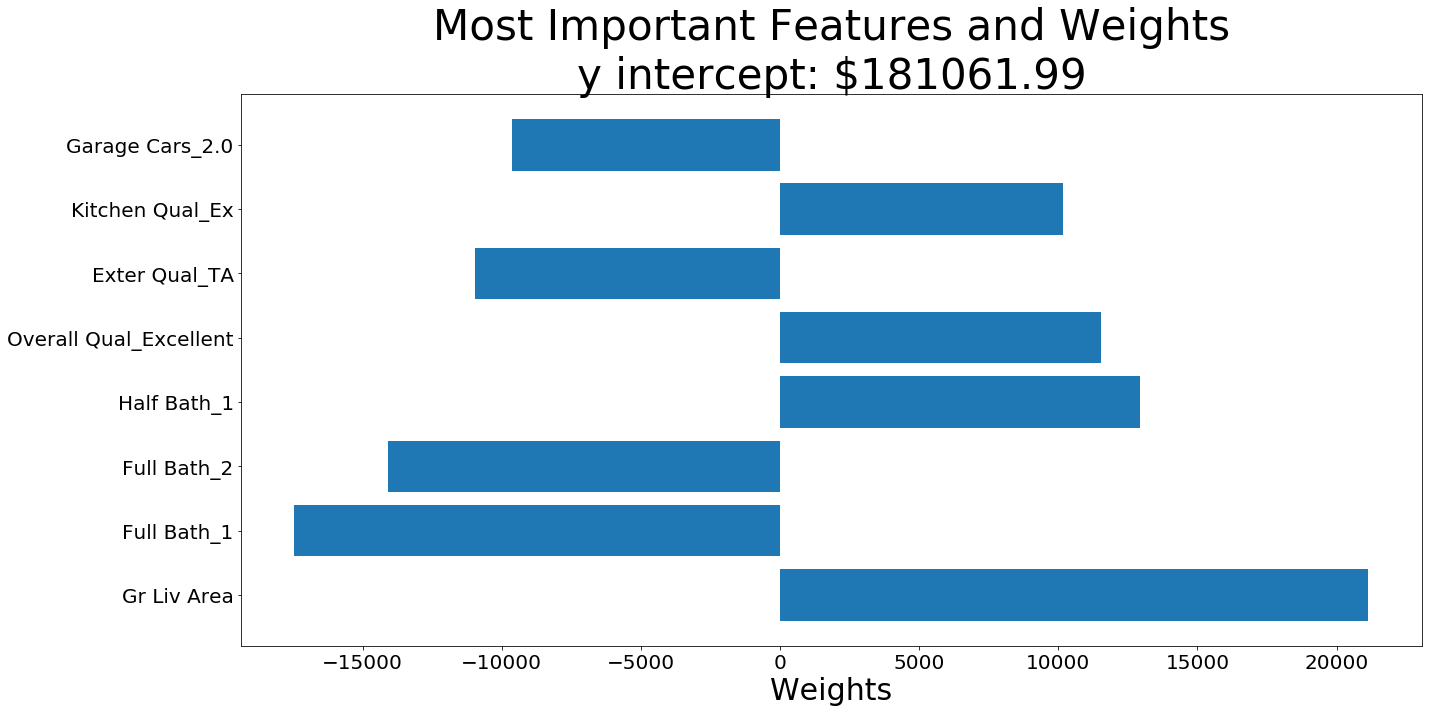

In [16]:
plt.figure(figsize=(20,10))
plt.barh(labels, weights)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Weights', fontsize=30)
plt.title(f'Most Important Features and Weights\ny intercept: ${beta_0:0.02f}', fontsize=42)
plt.tight_layout()

This creates a graph of the features that are most important towards determining sale price and their associated weights.  

In [17]:
def md_coef_table(labels, weights):
    print('| feature | weight |\n| --- | --- |')
    for i in range(len(labels)):
        print(f'| {labels[i]} | {weights[i]:.2e} |')

In [18]:
md_coef_table(labels, weights)

| feature | weight |
| --- | --- |
| Gr Liv Area | 2.11e+04 |
| Full Bath_1 | -1.75e+04 |
| Full Bath_2 | -1.41e+04 |
| Half Bath_1 | 1.29e+04 |
| Overall Qual_Excellent | 1.15e+04 |
| Exter Qual_TA | -1.09e+04 |
| Kitchen Qual_Ex | 1.02e+04 |
| Garage Cars_2.0 | -9.64e+03 |


| feature | weight |
| --- | --- |
| Gr Liv Area | 1.92e+04 |
| Full Bath_1 | -1.58e+04 |
| Overall Qual | 1.48e+04 |
| Full Bath_2 | -1.31e+04 |
| Fireplaces_1 | 1.25e+04 |
| Half Bath_1 | 1.14e+04 |
| Fireplace Qu_No Fireplace | 1.02e+04 |
| Fireplaces_2 | 9.65e+03 |

From my preliminary analysis, I surmise that the magnitude of the weights, being on a scale of 10 to the 4th power, means that my baseline model is sufficient enough for accurate prediction of my results. Additionally, it seems that the size of the general living area, number of fireplaces, and  the overall quality of the home is very important in determining the home's sale price.   